# Programming Assignment 3: Approximation Algorithms
## Imports

In [1]:
from random import randint, uniform

import networkx as nx
from matplotlib import pyplot as plt
from matplotlib.patches import Circle

## Problem 1: Max-cut Problem

In [2]:
def draw_graph(n, edge_list, node_set_flag, set1_color="lightblue", set2_color="red"):
    # Get the list of nodes in various sets and edges that are cut and uncut
    set1_nodes = [i for i in range(1, n + 1) if node_set_flag[i - 1]]
    set2_nodes = [i for i in range(1, n + 1) if not node_set_flag[i - 1]]

    edge_list_not_cut = [(i, j) for i, j in edge_list if node_set_flag[i - 1] == node_set_flag[j - 1]]
    edge_list_cut = [(i, j) for i, j in edge_list if node_set_flag[i - 1] != node_set_flag[j - 1]]

    # Draw the graph
    G = nx.Graph()  # noqa: N806
    G.add_edges_from(edge_list)

    _, ax = plt.subplots()
    pos = nx.spring_layout(G, seed=1234)
    nx.draw_networkx_nodes(G, pos, nodelist=set1_nodes, node_color=set1_color, ax=ax)
    if len(set2_nodes) >= 1:
        nx.draw_networkx_nodes(G, pos, nodelist=set2_nodes, node_color=set2_color, alpha=0.5, ax=ax)

    labels = {i: i for i in range(1, n + 1)}
    nx.draw_networkx_labels(G, pos, labels=labels, ax=ax)
    nx.draw_networkx_edges(G, pos, width=2, edgelist=edge_list_not_cut, ax=ax)
    nx.draw_networkx_edges(G, pos, width=2, edgelist=edge_list_cut, edge_color="red", ax=ax)

    plt.show()

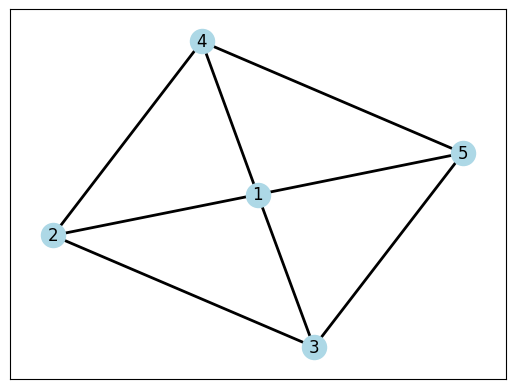

In [3]:
n = 5
edges = [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (3, 5), (4, 5)]
node_set_flag = [True] * n  # All nodes are in set1
draw_graph(n, edges, node_set_flag)

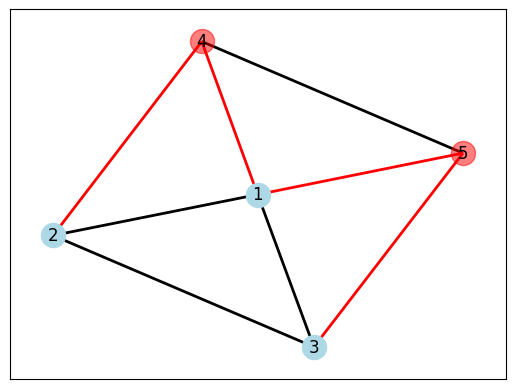

In [4]:
n = 5
edges = [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (3, 5), (4, 5)]
node_set_flag = [True, True, True, False, False]  # 1, 2, 3 are in set1
draw_graph(n, edges, node_set_flag)

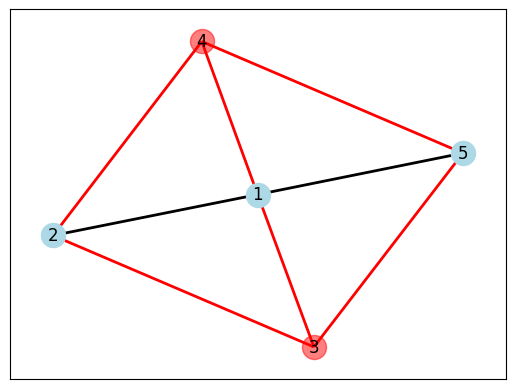

In [5]:
n = 5
edges = [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (3, 5), (4, 5)]
node_set_flag = [True, True, False, False, True]  # 1, 2, 5 are in set1
draw_graph(n, edges, node_set_flag)

In [6]:
def vertex_edge_counts(vertex, adj_list, cut):
    black_edges = sum(cut[vertex] == cut[neighbor] for neighbor in adj_list[vertex])
    red_edges = len(adj_list[vertex]) - black_edges
    return black_edges, red_edges


def flip_vertex(vertex, adj_list, cut, edge_counts, imbalanced):
    for neighbor in adj_list[vertex]:
        black, red = edge_counts[neighbor]
        if cut[vertex] == cut[neighbor]:
            edge_counts[neighbor] = (black - 1, red + 1)
        else:
            edge_counts[neighbor] = (black + 1, red - 1)

        if edge_counts[neighbor][0] > edge_counts[neighbor][1]:
            imbalanced.add(neighbor)
        else:
            imbalanced.discard(neighbor)

    black, red = edge_counts[vertex]
    edge_counts[vertex] = (red, black)
    cut[vertex] = not cut[vertex]

    return cut, edge_counts, imbalanced


# This is the function that you will implement the greedy algorithm.
# It should input a graph as an adjacency list and return a partition where
# every vertex is balanced, as described above.
# Return a list of Booleans of size n, wherein for any vertex v, if list[v] = True
# then it belongs to partition S1 otherwise to partition S2.
def find_balanced_cut(n, adj_list):
    assert n >= 1
    assert len(adj_list) == n

    # Check that the adjacency list makes sense and represents a directed graph
    for i, neighbors in enumerate(adj_list):
        assert i not in neighbors  # No self loops allowed
        assert all(0 <= j < n for j in neighbors)
        assert all(i in adj_list[j] for j in neighbors)

    # Start with an initial cut that places first n/2 nodes in S1 and rest in S2
    cut = [i < n / 2 for i in range(n)]

    # Run the greedy algorithm
    edge_counts = [vertex_edge_counts(v, adj_list, cut) for v in range(n)]
    imbalanced = {v for v in range(n) if edge_counts[v][0] > edge_counts[v][1]}

    while len(imbalanced) > 0:
        vertex = imbalanced.pop()
        cut, edge_counts, imbalanced = flip_vertex(vertex, adj_list, cut, edge_counts, imbalanced)

    return cut

In [7]:
# These are useful functions for the test cases


# Make an adjacency list out of a list of edges
def mk_adjacency_list(n, edge_list):
    adj_list = [set() for _ in range(n)]
    for i, j in edge_list:
        adj_list[i].add(j)
        adj_list[j].add(i)
    return adj_list


# Test partition
def test_cut(n, adj_list, cut):
    num_edges_crossing_cut = [0] * n
    for i, neighbors in enumerate(adj_list):
        num_edges_crossing_cut[i] = sum(cut[i] != cut[j] for j in neighbors)
        assert (
            2 * num_edges_crossing_cut[i] >= len(neighbors)
        ), f"Test Failed: In your cut, vertex {i} has {len(neighbors)} edges incident on it but only {num_edges_crossing_cut[i]} edges cross the cut"

In [8]:
n = 5
edge_list = [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (2, 4), (3, 4)]
adj_list = mk_adjacency_list(n, edge_list)
print(f"Adjacency list is {adj_list}")
cut = find_balanced_cut(n, adj_list)
test_cut(n, adj_list, cut)
print("Tests Passed (5 points)")

Adjacency list is [{1, 2, 3, 4}, {0, 2, 3}, {0, 1, 4}, {0, 1, 4}, {0, 2, 3}]
Tests Passed (5 points)


In [9]:
n = 8
edge_list = [
    (0, 1),
    (0, 2),
    (0, 3),
    (0, 4),
    (0, 5),
    (0, 6),
    (1, 2),
    (1, 3),
    (1, 4),
    (1, 5),
    (1, 6),
    (1, 7),
    (2, 3),
    (2, 5),
    (2, 7),
    (3, 4),
    (3, 6),
    (3, 7),
    (4, 6),
    (4, 6),
    (4, 7),
    (5, 6),
    (5, 7),
    (6, 7),
]
adj_list = mk_adjacency_list(n, edge_list)
print(f"Adjacency list is {adj_list}")
cut = find_balanced_cut(n, adj_list)
test_cut(n, adj_list, cut)
print("Tests Passed (5 points)")

Adjacency list is [{1, 2, 3, 4, 5, 6}, {0, 2, 3, 4, 5, 6, 7}, {0, 1, 3, 5, 7}, {0, 1, 2, 4, 6, 7}, {0, 1, 3, 6, 7}, {0, 1, 2, 6, 7}, {0, 1, 3, 4, 5, 7}, {1, 2, 3, 4, 5, 6}]
Tests Passed (5 points)


In [10]:
%%timeit
# WARNING: These graphs are going to be large. Make sure that your code is
# efficient enough to finish running this cell within 1 minute at worst.
def mk_random_graph(n, m):
    adj_list = [set() for _ in range(n)]
    for _ in range(m):
        i = randint(0, n - 1)
        j = randint(0, n - 1)
        if i == j:
            continue
        adj_list[i].add(j)
        adj_list[j].add(i)
    return adj_list


# Making random graph with 100 nodes and 10000 edges
n, m = 100, 10000
adj_list = mk_random_graph(n, m)
cut = find_balanced_cut(n, adj_list)
test_cut(n, adj_list, cut)

# Making random graph with 100 nodes and 1000 edges
n, m = 100, 1000
adj_list = mk_random_graph(n, m)
cut = find_balanced_cut(n, adj_list)
test_cut(n, adj_list, cut)

# Making random graph with 250 nodes and 2500 edges
n, m = 250, 2500
adj_list = mk_random_graph(n, m)
cut = find_balanced_cut(n, adj_list)
test_cut(n, adj_list, cut)

# Making random graph with 500 nodes and 10000 edges
n, m = 500, 10000
adj_list = mk_random_graph(n, m)
cut = find_balanced_cut(n, adj_list)
test_cut(n, adj_list, cut)

68.2 ms ± 2.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Problem 2: k-centers Clustering Problem

In [11]:
def euclidean_distance(a, b):
    (xa, ya) = a
    (xb, yb) = b
    return ((xb - xa) ** 2 + (yb - ya) ** 2) ** (1 / 2)


def calculate_R(coords, center_indices):
    n = len(coords)
    assert all(0 <= j < n for j in center_indices)
    rj_values = [min(euclidean_distance(xj, coords[j]) for j in center_indices) for xj in coords]
    return max(rj_values)


def plot_coords(coords, center_indices):
    R = calculate_R(coords, center_indices)  # noqa: N806

    coords_x = [x for x, _ in coords]
    coords_y = [y for _, y in coords]

    centers_x = [coords_x[j] for j in center_indices]
    centers_y = [coords_y[j] for j in center_indices]

    _, ax = plt.subplots()
    ax.axis("equal")

    for k in center_indices:
        c = Circle(
            coords[k],
            R,
            fill=True,
            alpha=0.5,
            facecolor="lightblue",
            clip_on=False,
            edgecolor="black",
            linewidth=1,
            linestyle="dashed",
        )
        ax.add_artist(c)

    ax.scatter(coords_x, coords_y, s=30, marker="x")
    ax.scatter(centers_x, centers_y, s=50, marker="o")

    plt.show()

R = 8.06225774829855


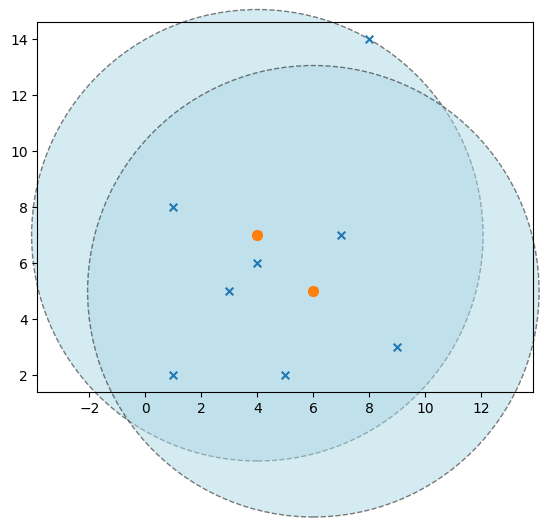

In [12]:
coords = [(1, 2), (3, 5), (4, 7), (8, 14), (9, 3), (7, 7), (6, 5), (4, 6), (5, 2), (1, 8)]
center_indices = [2, 6]
R = calculate_R(coords, center_indices)
print(f"R = {R}")
plot_coords(coords, center_indices)

R = 7.0710678118654755


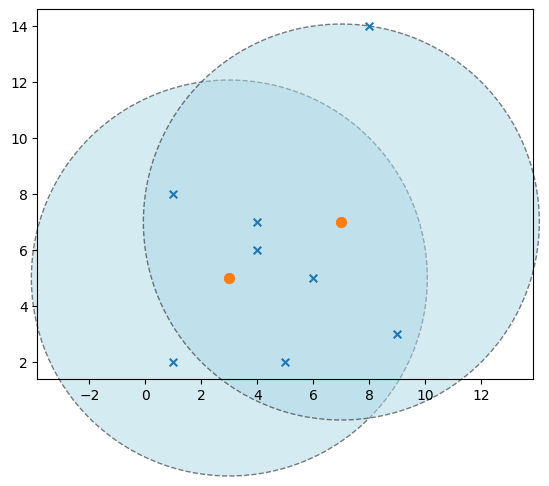

In [13]:
coords = [(1, 2), (3, 5), (4, 7), (8, 14), (9, 3), (7, 7), (6, 5), (4, 6), (5, 2), (1, 8)]
center_indices = [1, 5]
R = calculate_R(coords, center_indices)
print(f"R = {R}")
plot_coords(coords, center_indices)

In [14]:
# Function find_farthest_point_from_current_centers returns a pair (j, rj) where
# - 0 <= j < len(coords) is the index of the farthest point P_j
# - rj is the distance of the point P_j from its nearest center
def find_farthest_point_from_current_centers(coords, center_indices):
    n = len(coords)
    assert all(0 <= j < n for j in center_indices)
    rj_values = [min(euclidean_distance(xi, coords[j]) for j in center_indices) for xi in coords]
    return max(enumerate(rj_values), key=lambda p: p[1])


# Implement a function greedy_k_centers that given a list of coordinates
# coords, returns center_list, R.
# - centers_list is a list of indices [j1, ..., jk].
#   Note that coords[j1], ..., coords[jk] will yield coordinates of the actual centers.
# - R is the radius resulting from the choice of the k centers.
def greedy_k_centers(coords, k, debug=True):  # noqa: FBT002
    centers_list = [0]  # Add the very first point
    if debug:
        print(f"Initial center: {coords[0]}")
    for _ in range(k - 1):
        j, _ = find_farthest_point_from_current_centers(coords, centers_list)
        centers_list.append(j)
    _, R = find_farthest_point_from_current_centers(coords, centers_list)  # noqa: N806
    return centers_list, R

Initial center: (1, 2)


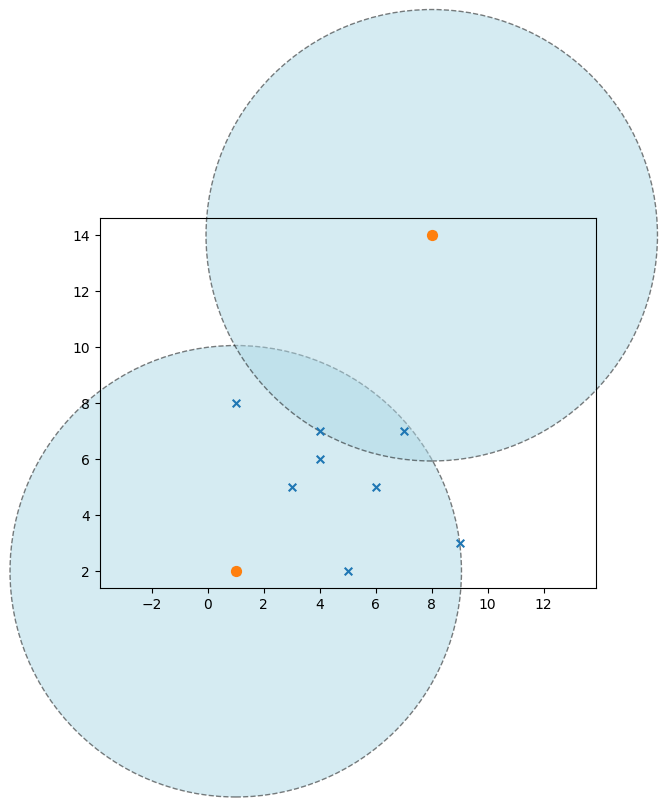

Passed test (5 points)


In [15]:
coords = [(1, 2), (3, 5), (4, 7), (8, 14), (9, 3), (7, 7), (6, 5), (4, 6), (5, 2), (1, 8)]
center_indices, R = greedy_k_centers(coords, 2)
plot_coords(coords, center_indices)
assert len(center_indices) == 2
assert (
    abs(R - calculate_R(coords, center_indices)) <= 1e-06
), f"The returned value of R={R} from your function does not match with my computation. Something is wrong in your calculations"
assert 4 <= R <= 16.2
print("Passed test (5 points)")

Initial center: (1, 2)


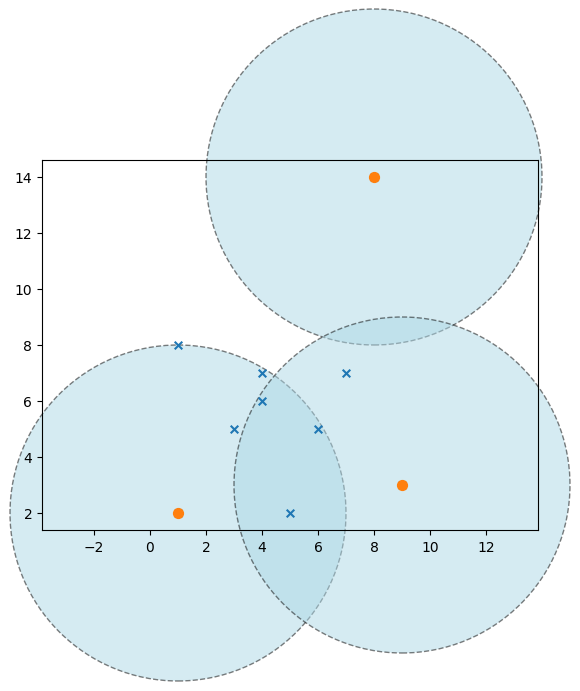

Passed test (5 points)


In [16]:
coords = [(1, 2), (3, 5), (4, 7), (8, 14), (9, 3), (7, 7), (6, 5), (4, 6), (5, 2), (1, 8)]
center_indices, R = greedy_k_centers(coords, 3)
plot_coords(coords, center_indices)
assert len(center_indices) == 3
assert (
    abs(R - calculate_R(coords, center_indices)) <= 1e-06
), f"The returned value of R={R} from your function does not match with my computation. Something is wrong in your calculations"
assert 3 <= R <= 12
print("Passed test (5 points)")

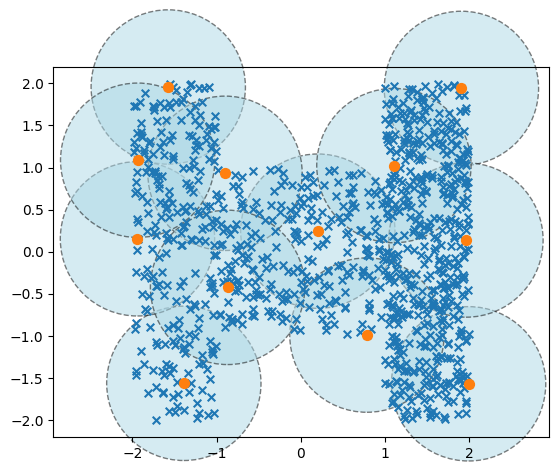

Test Passed (5 points)


In [17]:
# Generate 1000 points
n = 1000
coords = (
    [(uniform(-2, -1), uniform(-2, 2)) for _ in range(n // 4)]
    + [(uniform(-1, 1), uniform(-1, 1)) for _ in range(n // 4)]
    + [(uniform(1, 2), uniform(-2, 0)) for _ in range(n // 4)]
    + [(uniform(1, 2), uniform(0, 2)) for _ in range(n // 4)]
)

k = 12
center_indices, R = greedy_k_centers(coords, k, debug=False)
plot_coords(coords, center_indices)
assert len(center_indices) == k
assert (
    abs(R - calculate_R(coords, center_indices)) <= 1e-06
), f"The returned value of R={R} from your function does not match with my computation. Something is wrong in your calculations"
print("Test Passed (5 points)")